### UMAP visualization of modifid current signals

In [2]:
import numpy as np

def get_feature(file,data_length,label):
    """
    Read data from a file and extract features up to a specified length.

    Args:
        file (str): Path to the file.
        data_length (int): Maximum number of data points to extract.
        label: The label for the data.

    Returns:
        tuple: A tuple containing the extracted features (X) and labels (Y).

    """
    f=open(file)
    X,Y=[],[]
    kmer_encode_dic={'A': 0, "C": 1, "G": 2, "T": 3} 
    for i,line in enumerate(f):
        if i<10000:
            continue
        if i>=data_length+10000:
            f.close()
            return X,Y
        line=line.rstrip()
        items=line.split("\t")
        contig=items[1]

        signals="|".join(items[9:14]).split("|")
        signal=np.array([float(signal) for signal in signals])

        kmer = items[3]
        kmer=[kmer_encode_dic[base] for base in kmer]
        mean = [float(item) for item in items[4].split("|")]
        std = [float(item) for item in items[5].split("|")]
        intense = [float(item) for item in items[6].split("|")]
        dwell = [float(item)/200 for item in items[7].split("|")]
        base_quality =[float(item)/40 for item in items[8].split("|")]
        #x=[signal, kmer, mean, std, intense, dwell,base_quality]
        x=[]
        x.extend(signal)
        x.extend(kmer)
        x.extend(mean)
        x.extend(std)
        x.extend(intense)
        x.extend(dwell)
        x.extend(base_quality)
        X.append(x)
        Y.append(label)
    f.close()
    return X,Y

X_raw,Y_raw=[],[]   
data_length=1e3

#unmod
#label=0
#file="ELIGOS_normalA/feature/median_mad/ELIGOS_normalA_length_1000"
#x,y=get_feature(file,data_length,label)
#X_raw.extend(x)
#Y_raw.extend(y)

label=1
file="/home/wuyou/Projects/paper/ELIGOS_m1A/feature/median_mad/ELIGOS_m1A_length_1000"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)

label=2
file="/home/wuyou/Projects/paper/ELIGOS_m6A/feature/median_mad/ELIGOS_m6A_length_1000"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)

label=3
file="/home/wuyou/Projects/paper/ELIGOS_m5C/feature/median_mad/ELIGOS_m5C"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)

label=4
file="/home/wuyou/Projects/paper/ELIGOS_hm5C/feature/median_mad/ELIGOS_hm5C"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)

label=5
file="/home/wuyou/Projects/paper/ELIGOS_m7G/feature/median_mad/ELIGOS_m7G"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)

label=6
file="/home/wuyou/Projects/paper/ELIGOS_psU/feature/median_mad/ELIGOS_psU"
x,y=get_feature(file,data_length,label)
X_raw.extend(x)
Y_raw.extend(y)


/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDepr

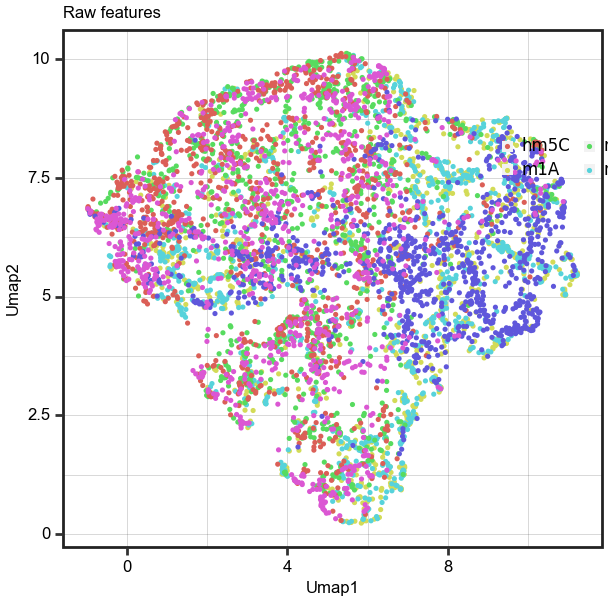

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.04 x 3.04 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_4g_UMAP_visualization_of_raw_features.pdf


In [3]:
import umap
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd

reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(X_raw)

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"

label_dict={0:"unmod",1:"m1A",2:"m6A",3:"m5C",4:"hm5C",5:"m7G",6:"Ψ"}
label=[label_dict[item] for item in Y_raw]

data=pd.DataFrame(embedding)
data.columns=["Umap1","Umap2"]
data["label"]=label
data["A"]=[0]*len(Y_raw)




p =(ggplot(aes(x='Umap1', y='Umap2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=1)
    +theme(
        figure_size=[1.52*2,1.52*2],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.2,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.2,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(1,0.76), 
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Raw features")
    #+scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/figure_4g_UMAP_visualization_of_raw_features.pdf')